In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from SupervisedAD_methods import *
from kdd import *

# Data Preprocessing

In [2]:
df = get_df('data/KDDTrain+.txt', columns=columns, drop=False)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
test_df = get_df('data/KDDTest+.txt', columns=columns, drop=False)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# categorical features
features_to_encode = ['protocol_type', 'service', 'flag']

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [5]:
data_train, data_test = feat_eng(df, test_df)
data_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,num_compromised,urgent,dst_host_count,srv_count,num_shells,num_root,dst_host_srv_serror_rate,hot,rerror_rate,serror_rate
0,0,1,0,0,0,0,0,0,0,0,...,0,0,150,2,0,0,0.00,0,0.0,0.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,255,1,0,0,0.00,0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,255,6,0,0,1.00,0,0.0,1.0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,30,5,0,0,0.01,0,0.0,0.2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,255,32,0,0,0.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,0,0,255,25,0,0,1.00,0,0.0,1.0
125969,0,0,1,0,0,0,0,0,0,0,...,0,0,255,2,0,0,0.00,0,0.0,0.0
125970,0,1,0,0,0,0,0,0,0,0,...,0,0,255,1,0,0,0.00,0,0.0,0.0
125971,0,1,0,0,0,0,0,0,0,0,...,0,0,255,8,0,0,1.00,0,0.0,1.0


In [6]:
scaler = StandardScaler()

new_attacks = [1,2,3,4]
test_classes = [0,1,2,3,4]


def get_x_y(df, data, classes=[0,1]):
    '''
    y is 1 if normal and 0 if attack/anomalous
    '''

    indices = df['attack_map'].isin(classes)
    x = data[indices]
    y = df['normal_flag'][indices]
    
    return x.to_numpy(), y.to_numpy()


x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

# Modelling

In [7]:
def generate_anomalies(x, num: int, delta: float=0.05, seed=23):
    
    '''
    MADI Paper from Google [ICML]
    https://github.com/google/madi/blob/master/src/madi/utils/sample_utils.py
    
    Creates anomalous samples from the cuboid bounded by +/- delta.

  Where, [min - delta, max + delta] for each of the dimensions.
  The positive sample, pos_sample is a pandas DF that has a column
  labeled 'class_label' where 1.0 indicates Normal, and
  0.0 indicates anomalous.

  Args:
    x: normalised DF / array-like with numeric dimensions
    num: number points to be returned
    delta: fraction of [max - min] to extend the sampling.

  Returns:
    A dataframe  with the same number of columns, and a label column
    'class_label' where every point is 0.
    '''
    
    max_dim = np.max(x, axis=0)
    min_dim = np.min(x, axis=0)
    
    interval = max_dim - min_dim
    buffer = delta * interval
    
    np.random.seed(seed)
    anomalies_generated = np.random.uniform(low=min_dim-buffer, high=max_dim+buffer, size=(num, len(max_dim)))
    
    return np.vstack((x, anomalies_generated))

In [8]:
print(X.shape, y.shape)
seed_shuffle = 1234

# may want to decrease this
ratio = 10

num_normal = np.sum(y)
num_train_original = len(y)
num_generated_anomalies = ratio * num_normal

X = generate_anomalies(X, num_generated_anomalies)
y = np.hstack((y, np.zeros(num_generated_anomalies)))

np.random.seed(seed_shuffle)
np.random.shuffle(X)
np.random.seed(seed_shuffle)
np.random.shuffle(y)

X.shape, y.shape

(113279, 122) (113279,)


((786709, 122), (786709,))

## Neural Networks

In [9]:
# Build Models

def build_layer(activation, input_layer, sigma=0.5, train=False, layer_number=1,
                seed=0, neurons=5, batchnorm=False, regulariser=None):
    
    initialiser = tf.keras.initializers.GlorotUniform(seed=seed)
    
    if activation == "r":
        layer = RBFLayer(neurons, gamma=1.0, initializer=initialiser)(input_layer)
        
        if batchnorm:
            layer = tf.keras.layers.BatchNormalization()(layer)
            
    else:
        hidden = tf.keras.layers.Dense(neurons,
                      kernel_initializer=initialiser, kernel_regularizer=regulariser)(input_layer)
        
        if batchnorm:
            hidden = tf.keras.layers.BatchNormalization()(hidden)
            
        if activation == "b":
            layer = Bump(sigma=sigma, trainable=train,
                              name=f"bump{layer_number}")(hidden)
        elif activation == "s":
            layer = tf.math.sigmoid(hidden)
        else:
            layer = tf.nn.leaky_relu(hidden, alpha=0.01)
    
    return layer


def create_model(separation, activation, hidden_layers, num_inputs,
                 hidden_neurons=[40, 20, 10, 5], dropout=[0.0, 0.0, 0.0, 0.0], lr=3e-4,
                 regularisation=[None, None, None, None],
                 sigma=0.5, train=False, loss='binary_crossentropy', batchnorm=False,
                 seed=0, name_suffix=""):
    
    sep = {"RBF": "r", "ES": "b", "HS": "s"}
    
    tf.keras.utils.set_random_seed(seed)

    input_layer = tf.keras.Input(shape=(num_inputs,))
    
    if len(hidden_neurons) != 0:
        
        hidden_layers = len(hidden_neurons)
        hidden = input_layer
    
        for i, n in enumerate(hidden_neurons):
            hidden = build_layer(activation, hidden, sigma=sigma, train=train,
                                 layer_number=1+i, seed=seed+42*i, neurons=n,
                                 batchnorm=batchnorm, regulariser=regularisation[i])
            if dropout[i] > 0.:
                hidden = tf.keras.layers.Dropout(dropout[i])(hidden)
            
        out = build_layer(sep[separation], hidden, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)
        
    else:
        hidden1 = build_layer(activation, input_layer, sigma=sigma, train=train, layer_number=1, seed=seed+42)
        hidden2 = build_layer(activation, hidden1, sigma=sigma, train=train, layer_number=2, seed=seed+123)

        if hidden_layers == 2:

            out = build_layer(sep[separation], hidden2, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

        elif hidden_layers == 3:

            hidden3 = build_layer(activation, hidden2, sigma=sigma, train=train, layer_number=3, seed=seed+1234)   
            out = build_layer(sep[separation], hidden3, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

    model = tf.keras.Model(inputs=input_layer, outputs=out, name=f'{separation}{hidden_layers}{activation}{name_suffix}')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                            loss=loss)
    
    return model

In [10]:
# Train and Evaluate Models

def train_eval(model, X, y, x_test, y_test, epochs=1000, train=False, hidden_layers=2,
               verbose=0, shuffle=False, plot=False,
               val_split=0.1, callbacks=[early_stopping], seed=0, diff=True, writer=False,
               indiv=new_attacks, 
#                att_labels=df_test_att['attack'], 
              att_labels=test_df['attack_map'], pos_label=0):
    
    # Train the model
    tf.keras.utils.set_random_seed(seed)
    cbs = callbacks.copy()
    if train:
        # learnable sigma
        get_weights = GetWeights(layer_names=[f"bump{i}" for i in range(1, hidden_layers+1)])
        cbs.append(get_weights)
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)
        viz_sigma(get_weights)
        
    else:
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)

        
    # Evaluation
#     viz_boundary(data_viz, model, grid=grid, writer=writer)

    y_train = model.predict(X)
    aupr_train = get_metrics(y_train, y, model.name, plot=plot, pos_label=pos_label)
    
    y_pred = model.predict(x_test)
    aupr_test = get_metrics(y_pred, y_test, model.name, plot=plot, pos_label=pos_label)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv)/2, 7.5))
        
        aupr_attacks = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attacks.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model.name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
#             ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
        return aupr_train, aupr_test, aupr_attacks
    
    if diff:
        y_pos = np.mean(y_pred_pos)
        y_neg = np.mean(y_pred_neg)
        diff_mean = y_pos - y_neg
        print(f"Average Difference between Positive and Negative Class: {diff_mean}")
        
        return aupr_train, aupr_test, diff_mean
    
    return aupr_train, aupr_test

In [11]:
strategy = tf.distribute.MirroredStrategy()

num_inputs = X.shape[-1]

verbose = 1      # can change this to 0 to suppress verbosity during training
plot = True
shuffle = False
val_split = 0.1
repeats = 5
epochs = 500
batchnorm = True

lr = 3e-4


# lr = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.005,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True)
callbacks = [early_stopping]
# callbacks = []

neurons = [60]
# neurons = [40, 20, 10, 5]
# neurons = [150, 150, 80, 50, 30]
# dropout = [0.2, 0.5, 0.3, 0.05]
dropout = [0.0 for n in neurons]

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

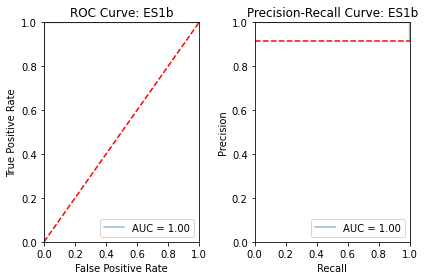

705/705 [==============================] - 2s 3ms/step


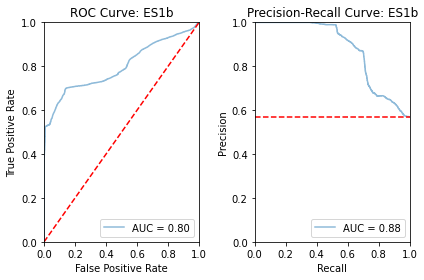

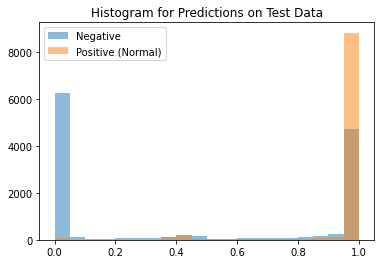

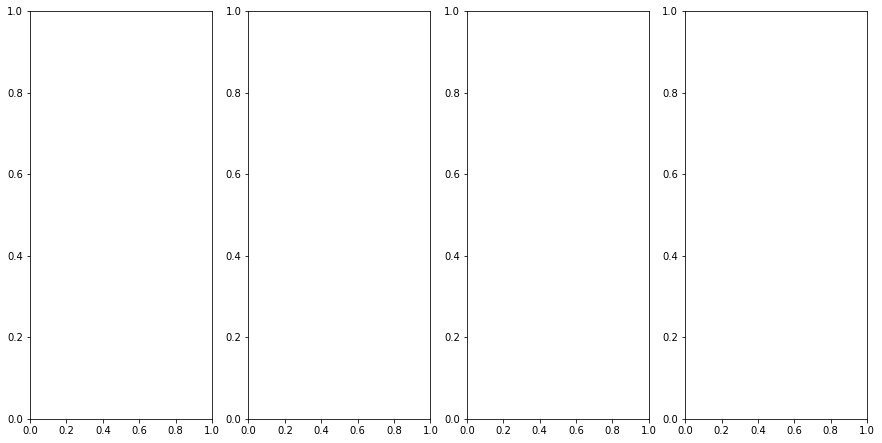

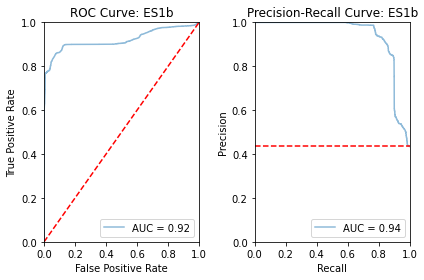

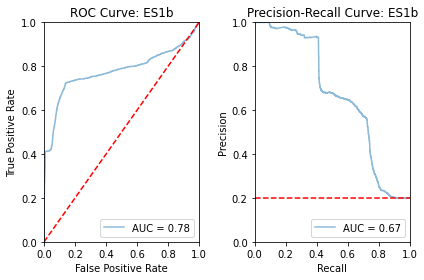

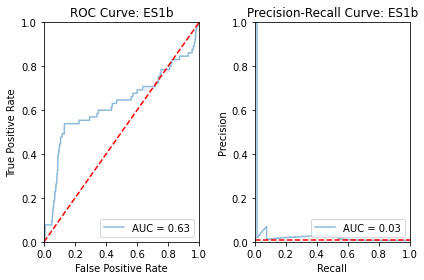

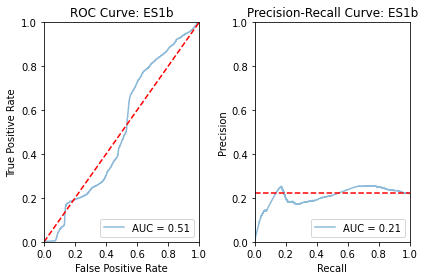

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


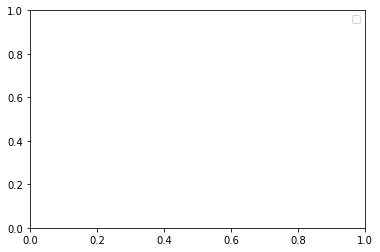

AUPR Train Run 1: 0.9999972226098526
AUPR Test Run 1: 0.8796099045559111
AUPR Indiv Test Run 1: [0.9380413667417395, 0.6705096726113695, 0.03213730653086582, 0.20948152231291065]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
22127/22127 [==============================] - 120s 5ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 2/500
22127/22127 [==============================] - 114s 5ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 3/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/5

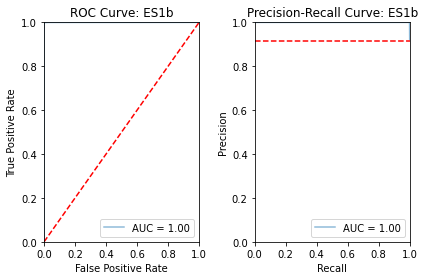

705/705 [==============================] - 2s 3ms/step


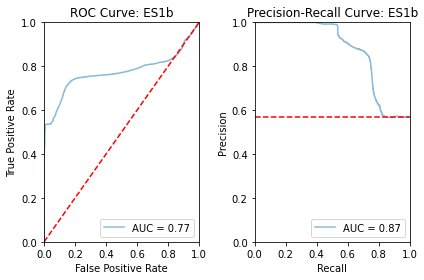

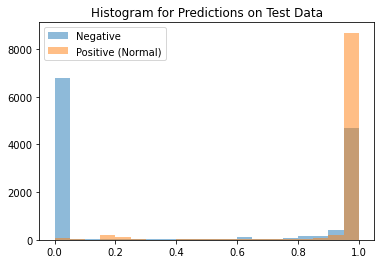

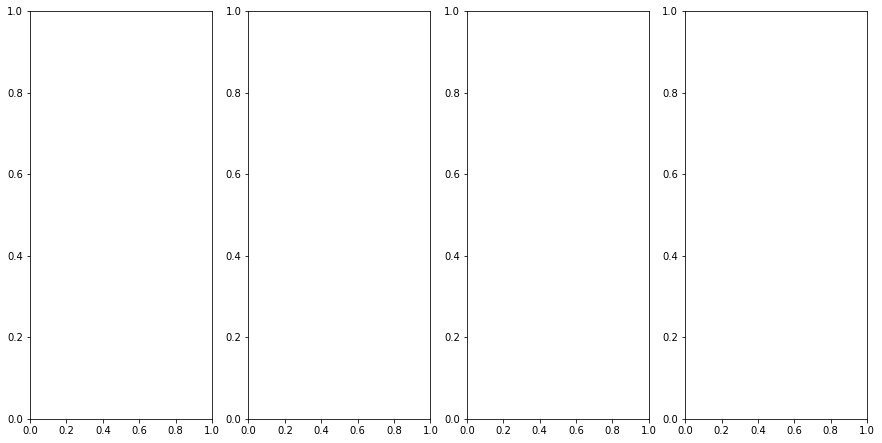

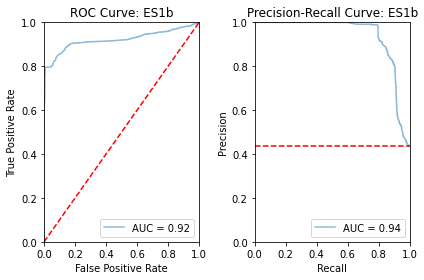

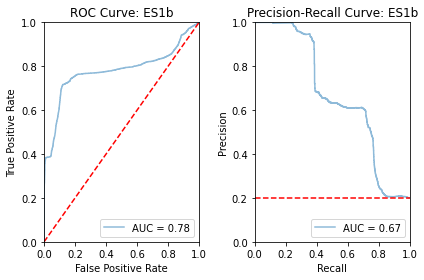

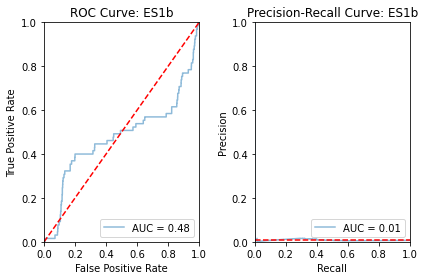

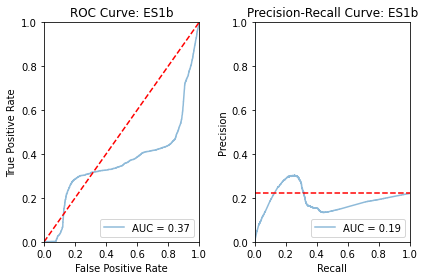

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


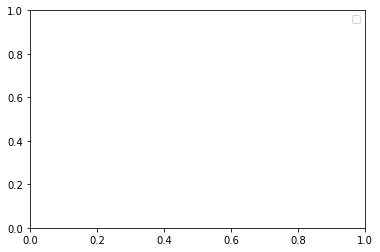

AUPR Train Run 2: 0.9999971727863959
AUPR Test Run 2: 0.8735275211648224
AUPR Indiv Test Run 2: [0.9389455344832135, 0.6655579019531299, 0.007757187029429097, 0.18842015585945776]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
22127/22127 [==============================] - 121s 5ms/step - loss: 0.0064 - val_loss: 0.0014
Epoch 2/500
22127/22127 [==============================] - 116s 5ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 3/500
22127/22127 [==============================] - 116s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/500
22127/22127 [==============================] - 116s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/500
22127/22127 [==============================] - 117s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 7/

22127/22127 [==============================] - 116s 5ms/step - loss: 8.2961e-04 - val_loss: 9.6100e-04
Epoch 73/500
22127/22127 [==============================] - 117s 5ms/step - loss: 8.1364e-04 - val_loss: 9.2721e-04
Epoch 74/500
22127/22127 [==============================] - 116s 5ms/step - loss: 8.2214e-04 - val_loss: 9.1820e-04
Epoch 75/500
22127/22127 [==============================] - 115s 5ms/step - loss: 8.1053e-04 - val_loss: 0.0010
Epoch 76/500
22127/22127 [==============================] - 116s 5ms/step - loss: 8.0559e-04 - val_loss: 9.6595e-04
Epoch 77/500
22127/22127 [==============================] - 116s 5ms/step - loss: 8.2137e-04 - val_loss: 0.0010
Epoch 78/500
22127/22127 [==============================] - 116s 5ms/step - loss: 8.1045e-04 - val_loss: 9.7651e-04
Epoch 79/500
24585/24585 [==============================] - 70s 3ms/step


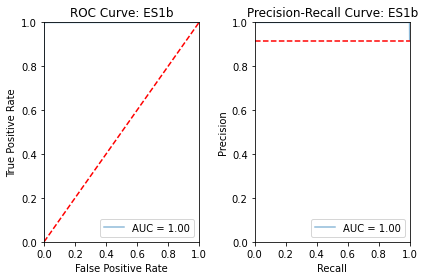

705/705 [==============================] - 2s 3ms/step


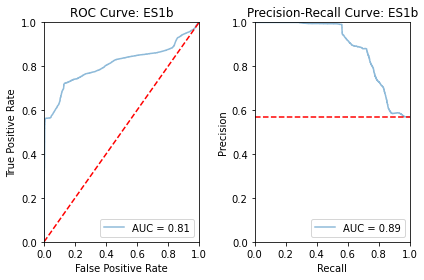

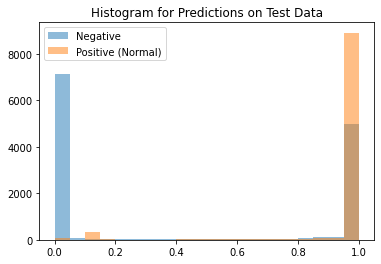

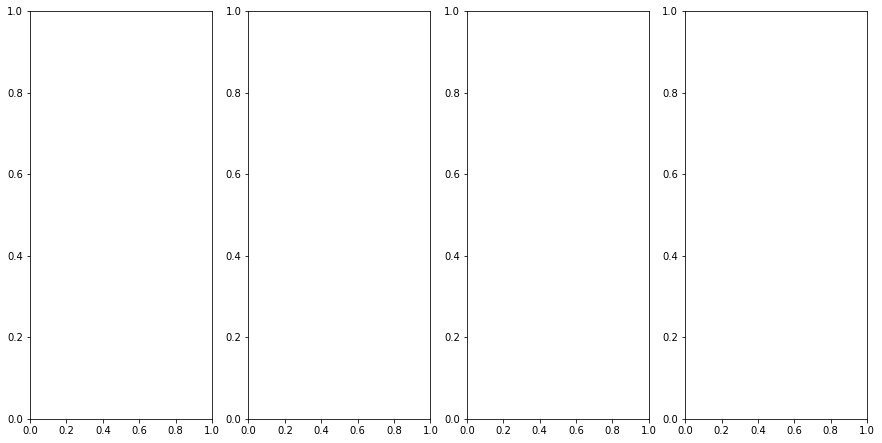

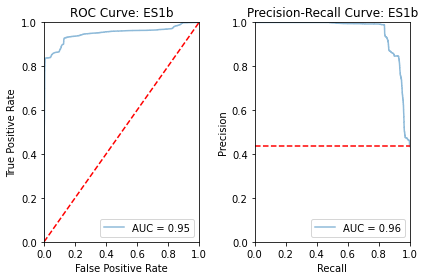

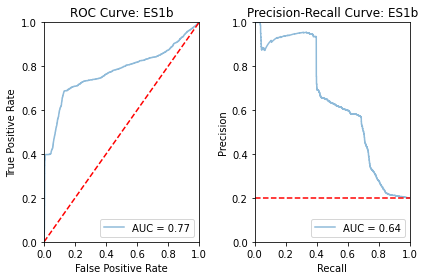

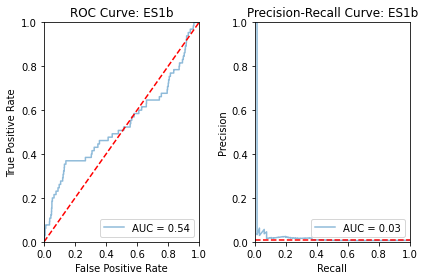

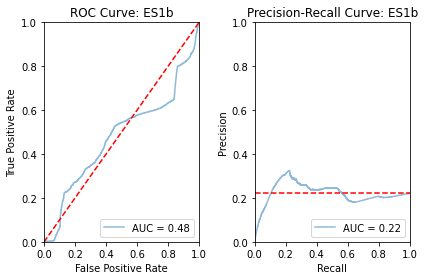

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


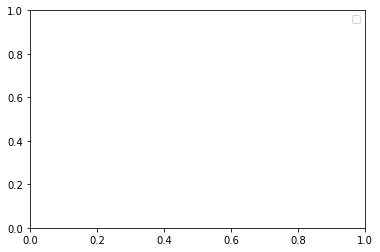

AUPR Train Run 3: 0.9999974127414987
AUPR Test Run 3: 0.8897685387441684
AUPR Indiv Test Run 3: [0.9580184869585325, 0.6397979712842496, 0.027653524933534845, 0.2207807977201931]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
22127/22127 [==============================] - 121s 5ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 2/500
22127/22127 [==============================] - 116s 5ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 3/500
22127/22127 [==============================] - 117s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/500
22127/22127 [==============================] - 117s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/500
22127/22127 [==============================] - 116s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/500
22127/22127 [==============================] - 116s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/5

KeyboardInterrupt: 

In [12]:
# ESb mse
separation = "ES"
bumped = "b"
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_es = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='mse', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_es.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

In [13]:
results = np.array([
    [0.8897685387441684, 0.9580184869585325, 0.6397979712842496, 0.027653524933534845, 0.2207807977201931],
    [0.8735275211648224, 0.9389455344832135, 0.6655579019531299, 0.007757187029429097, 0.18842015585945776],
    [0.8796099045559111, 0.9380413667417395, 0.6705096726113695, 0.03213730653086582, 0.20948152231291065]
])

np.mean(results, axis=0), np.std(results, axis=0)

(array([0.88096865, 0.9450018 , 0.65862185, 0.02251601, 0.20622749]),
 array([0.00669962, 0.00921159, 0.01346313, 0.01059538, 0.01341005]))

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

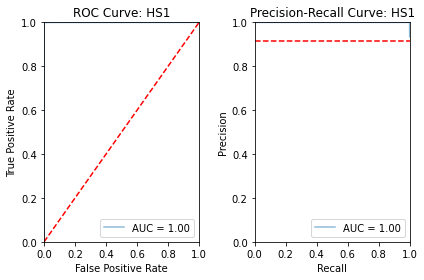

705/705 [==============================] - 2s 3ms/step


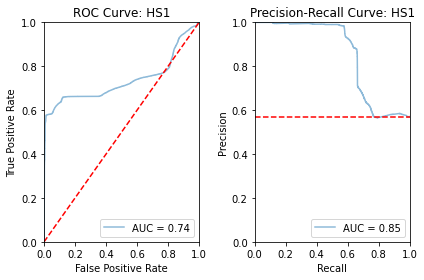

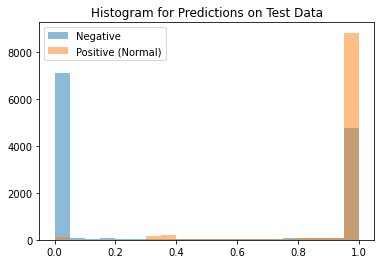

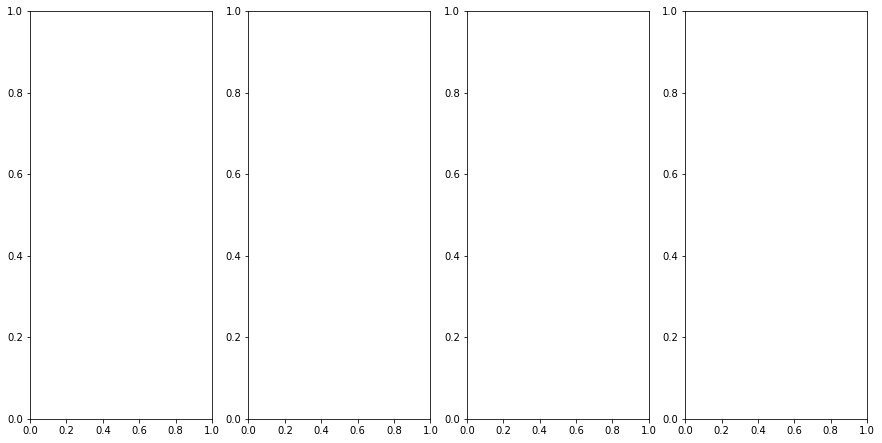

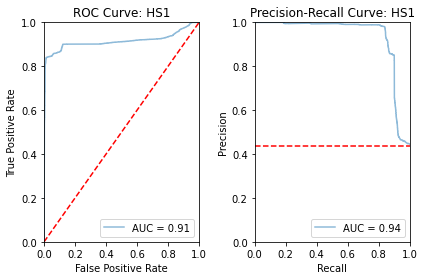

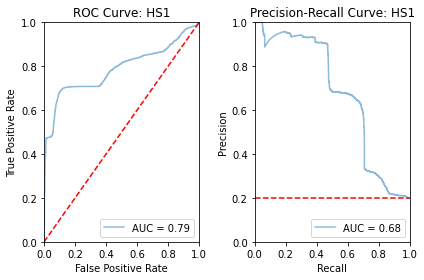

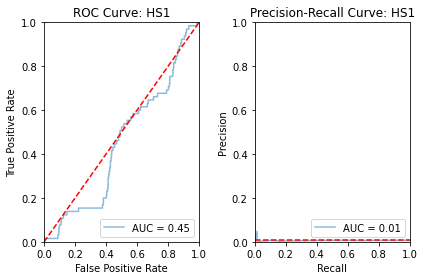

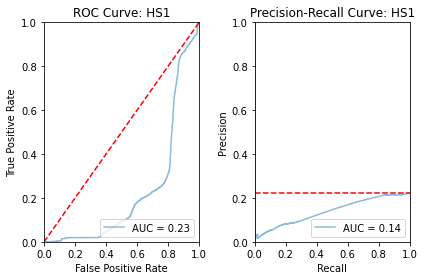

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


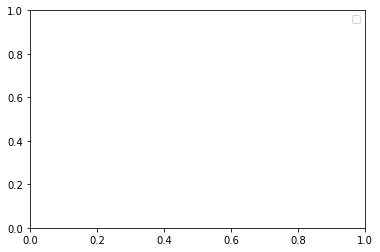

AUPR Train Run 1: 0.999997483115073
AUPR Test Run 1: 0.8532255362532106
AUPR Indiv Test Run 1: [0.9372796909091999, 0.6756504910175312, 0.005964554130243133, 0.13942649483571493]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
22127/22127 [==============================] - 119s 5ms/step - loss: 0.0192 - val_loss: 0.0062
Epoch 2/500
22127/22127 [==============================] - 114s 5ms/step - loss: 0.0081 - val_loss: 0.0057
Epoch 3/500
22127/22127 [==============================] - 114s 5ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 4/500
22127/22127 [==============================] - 113s 5ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 5/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0067 - val_loss: 0.0053
Epoch 6/500
22127/22127 [==============================] - 114s 5ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 7/5

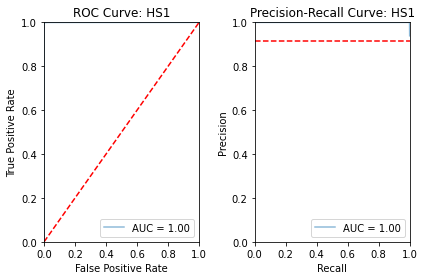

705/705 [==============================] - 2s 3ms/step


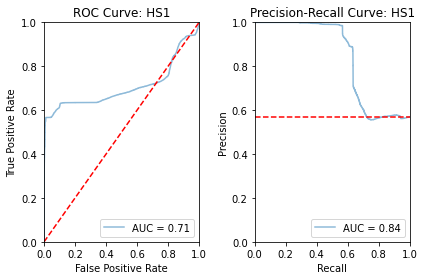

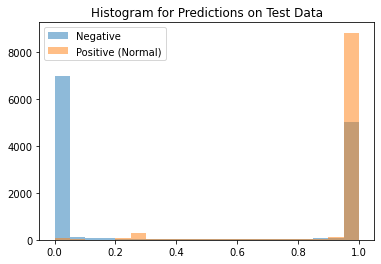

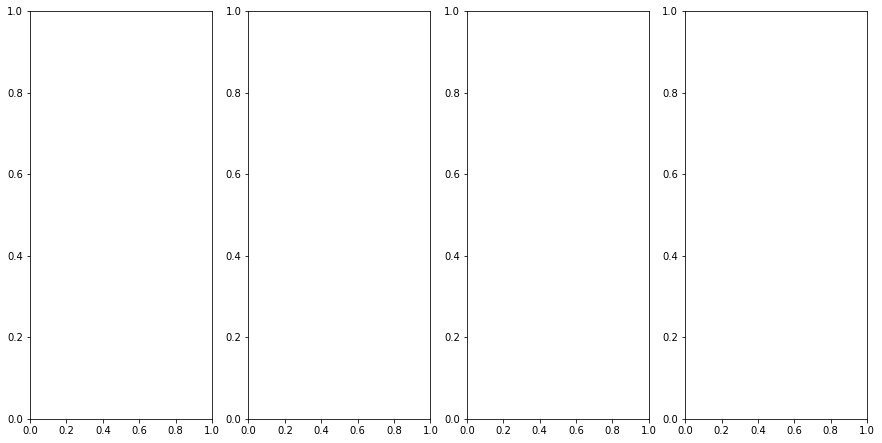

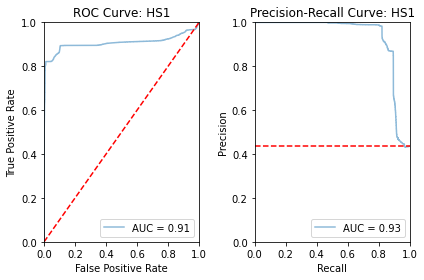

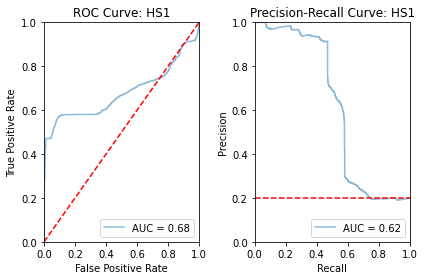

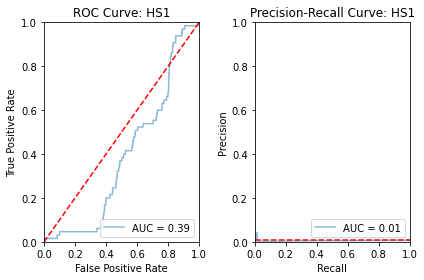

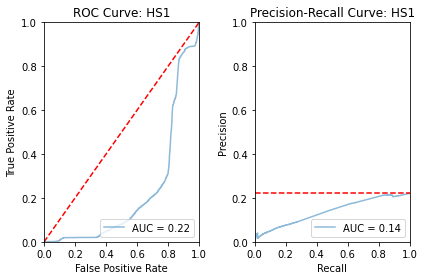

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


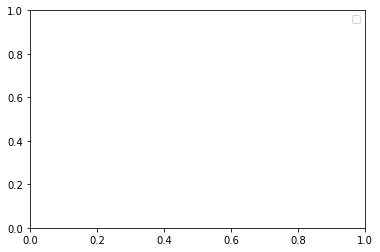

AUPR Train Run 2: 0.9999977039144969
AUPR Test Run 2: 0.840113055306803
AUPR Indiv Test Run 2: [0.9345766853872717, 0.6161451448697319, 0.005207974809557709, 0.1386352097499253]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
22127/22127 [==============================] - 120s 5ms/step - loss: 0.0193 - val_loss: 0.0062
Epoch 2/500
22127/22127 [==============================] - 114s 5ms/step - loss: 0.0080 - val_loss: 0.0056
Epoch 3/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0073 - val_loss: 0.0055
Epoch 4/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 5/500
22127/22127 [==============================] - 114s 5ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 6/500
22127/22127 [==============================] - 115s 5ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 7/50

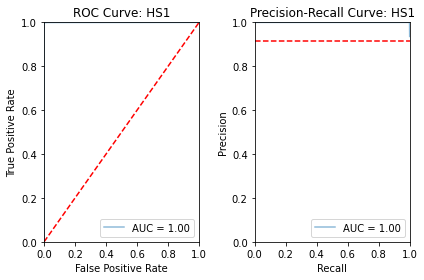

705/705 [==============================] - 2s 3ms/step


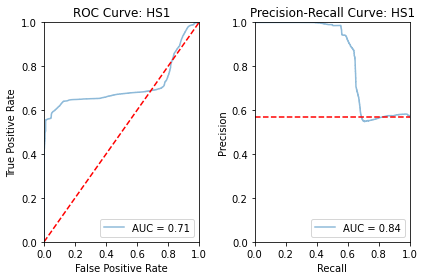

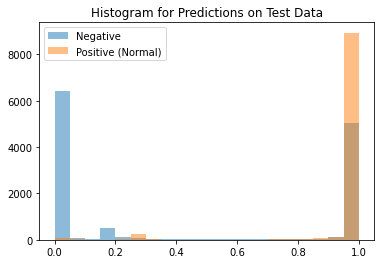

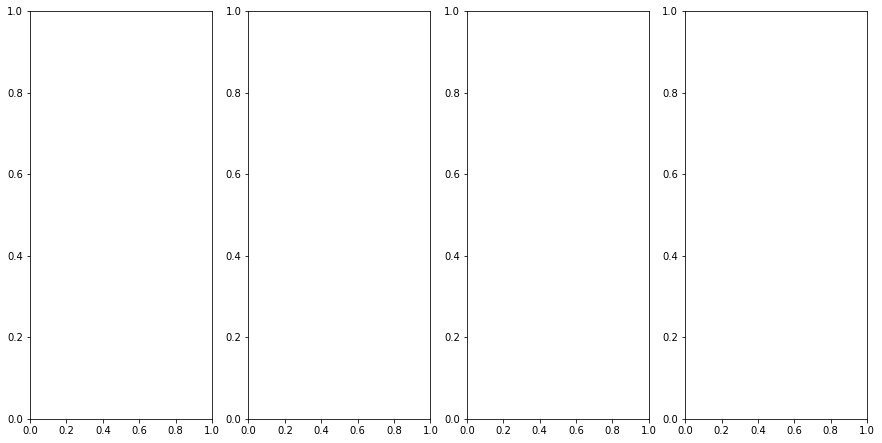

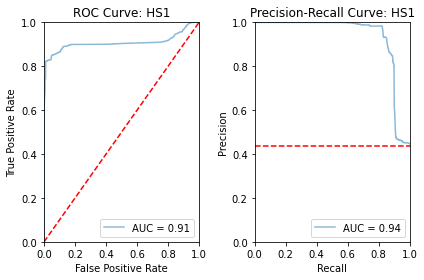

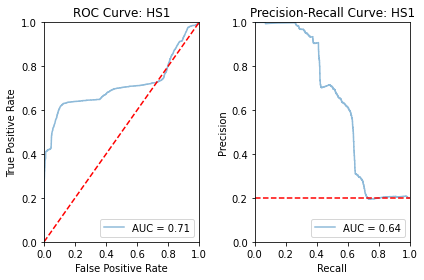

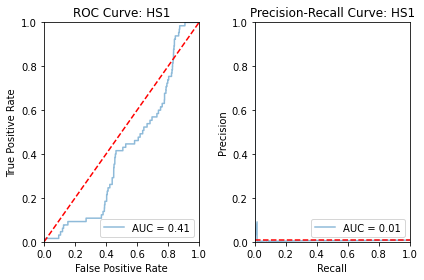

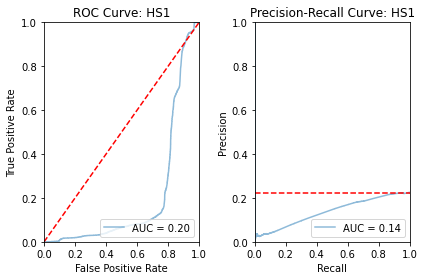

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


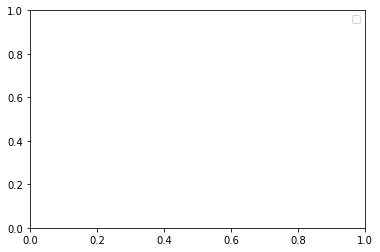

AUPR Train Run 3: 0.9999967695949228
AUPR Test Run 3: 0.8424258813979497
AUPR Indiv Test Run 3: [0.9357427555978204, 0.6352057178674108, 0.005760668124813926, 0.13750207101563447]
AUPR (Train): 0.9999973188748309+-3.987224678047877e-07
AUPR (Test): 0.8452548243193211+-0.0057146873744623235


,0,1,2,AUPR Mean,AUPR Std
1,0.937280,0.934577,0.935743,0.935866,0.001356
2,0.675650,0.616145,0.635206,0.642334,0.030386
3,0.005965,0.005208,0.005761,0.005644,0.000391
4,0.139426,0.138635,0.137502,0.138521,0.000967


([0.999997483115073, 0.9999977039144969, 0.9999967695949228],
 [0.8532255362532106, 0.840113055306803, 0.8424258813979497],
 {0: [0.9372796909091999,
   0.6756504910175312,
   0.005964554130243133,
   0.13942649483571493],
  1: [0.9345766853872717,
   0.6161451448697319,
   0.005207974809557709,
   0.1386352097499253],
  2: [0.9357427555978204,
   0.6352057178674108,
   0.005760668124813926,
   0.13750207101563447]})

In [14]:
# HS
repeats=3
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_hs = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
        
    models_hs.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "RBF1r"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 122)]             0         
                                                                 
 rbf_layer (RBFLayer)        (None, 60)                7320      
                                                                 
 batch_normalization_3 (Batc  (None, 60)               240       
 hNormalization)                                                 
                                                                 
 rbf_layer_1 (RBFLayer)      (None, 1)                 60        
                                                                 
Total params: 7,620
Trainable params: 7,500
Non-trainable params: 120
_________________________________________________________________
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 4 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_

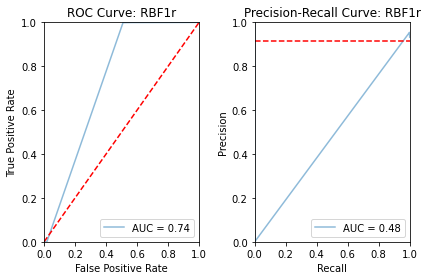

705/705 [==============================] - 2s 3ms/step


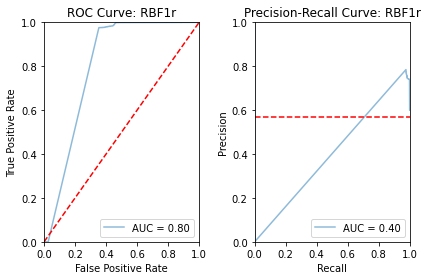

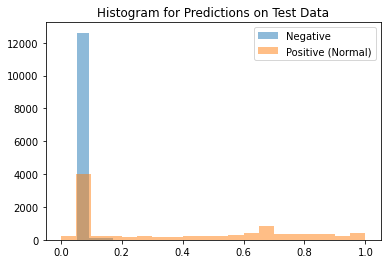

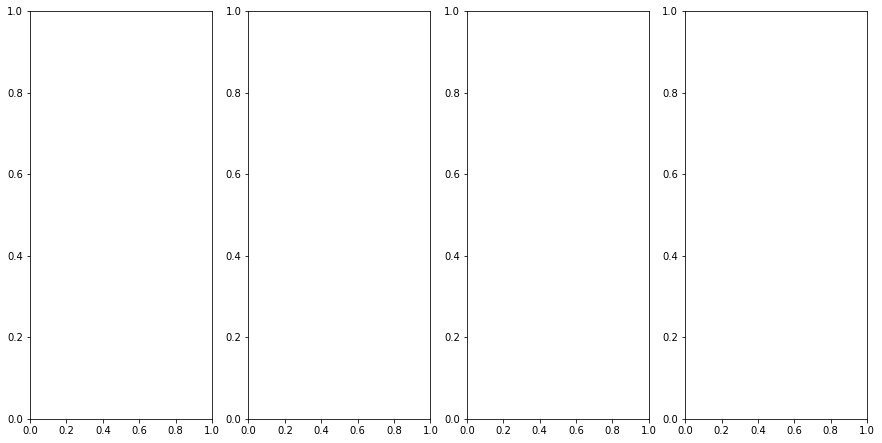

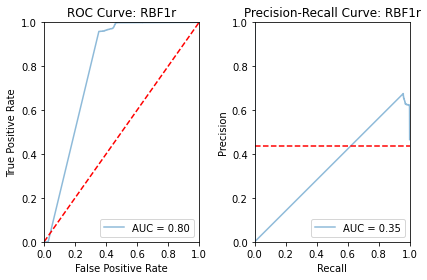

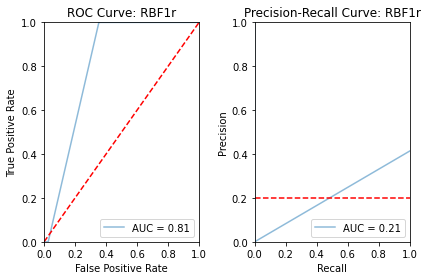

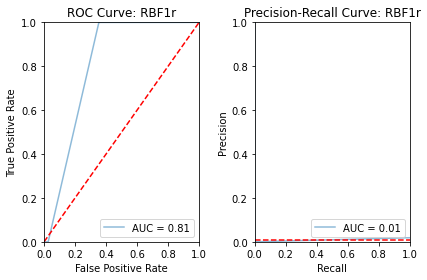

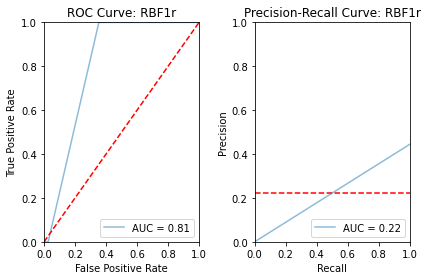

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


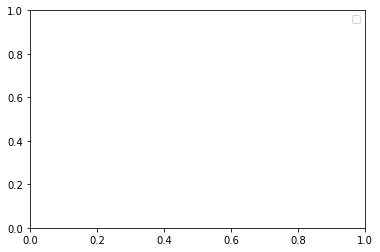

AUPR Train Run 1: 0.477759043801318
AUPR Test Run 1: 0.4009282449247838
AUPR Indiv Test Run 1: [0.3498838061592538, 0.20678168773488212, 0.009291023441966839, 0.22206930051813473]
Epoch 1/500
INFO:tensorflow:batch_all_reduce: 4 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 4 all-reduces with algorithm = nccl, num_packs = 1
22127/22127 [==============================] - 125s 5ms/step - loss: 0.2325 - val_loss: 0.2275
Epoch 2/500
22127/22127 [==============================] - 119s 5ms/step - loss: 0.2270 - val_loss: 0.2262
Epoch 3/500
22127/22127 [==============================] - 119s 5ms/step - loss: 0.2257 - val_loss: 0.2249
Epoch 4/500
22127/22127 [==============================] - 120s 5ms/step - loss: 0.2242 - val_loss: 0.2233
Epoch 5/500
22127/22127 [==============================] - 119s 5ms/step - loss: 0.2224 - val_loss: 0.2217
Epoch 6/500
22127/22127 [==============================] - 119s 5ms/step - loss: 0.2208 - val_loss: 0.2209
Epoch 7/

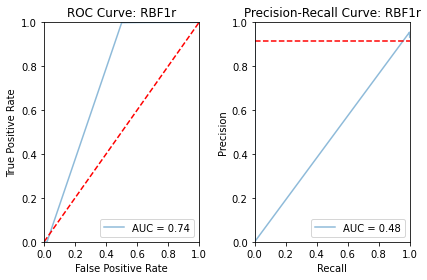

705/705 [==============================] - 2s 3ms/step


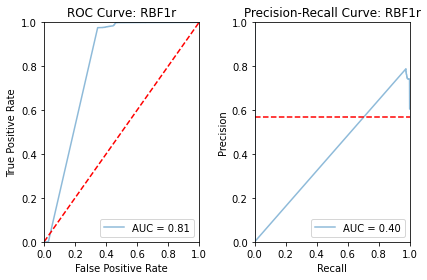

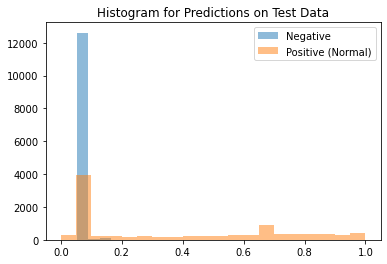

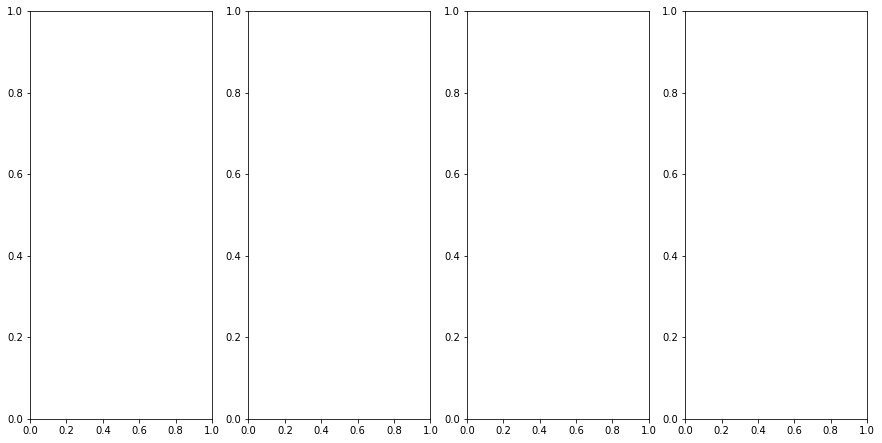

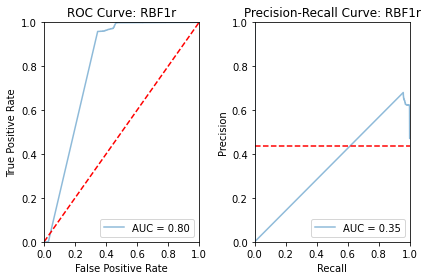

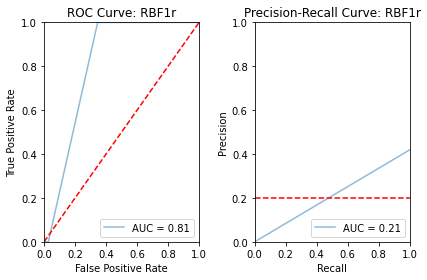

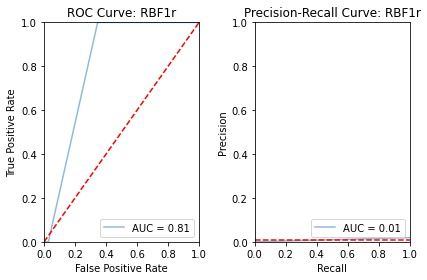

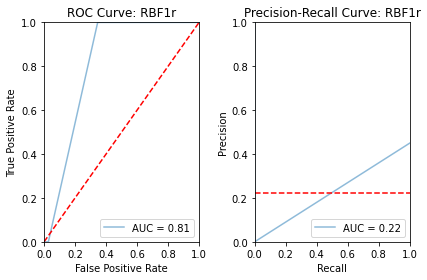

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


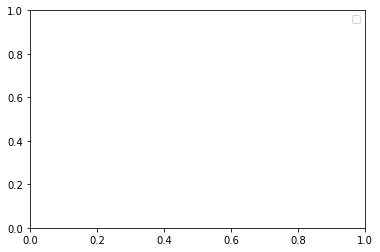

AUPR Train Run 2: 0.47812963079589027
AUPR Test Run 2: 0.4027497480735715
AUPR Indiv Test Run 2: [0.35220170515739224, 0.20946530541616196, 0.009494595384165937, 0.22479921324373053]
Epoch 1/500
22127/22127 [==============================] - 125s 5ms/step - loss: 0.2324 - val_loss: 0.2276
Epoch 2/500
22127/22127 [==============================] - 119s 5ms/step - loss: 0.2270 - val_loss: 0.2262
Epoch 3/500
22127/22127 [==============================] - 120s 5ms/step - loss: 0.2257 - val_loss: 0.2250
Epoch 4/500
22127/22127 [==============================] - 120s 5ms/step - loss: 0.2241 - val_loss: 0.2235
Epoch 5/500
22127/22127 [==============================] - 120s 5ms/step - loss: 0.2222 - val_loss: 0.2225
Epoch 6/500
22127/22127 [==============================] - 119s 5ms/step - loss: 0.2174 - val_loss: 0.2566
Epoch 7/500
22127/22127 [==============================] - 121s 5ms/step - loss: 0.2045 - val_loss: 0.2787
Epoch 8/500
22127/22127 [==============================] - 120s 5ms/

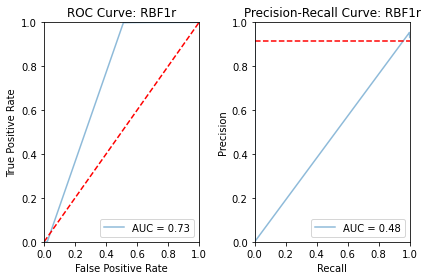

705/705 [==============================] - 2s 3ms/step


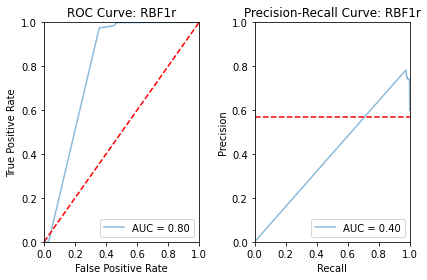

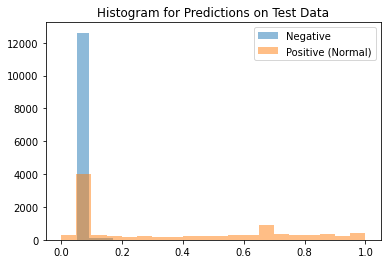

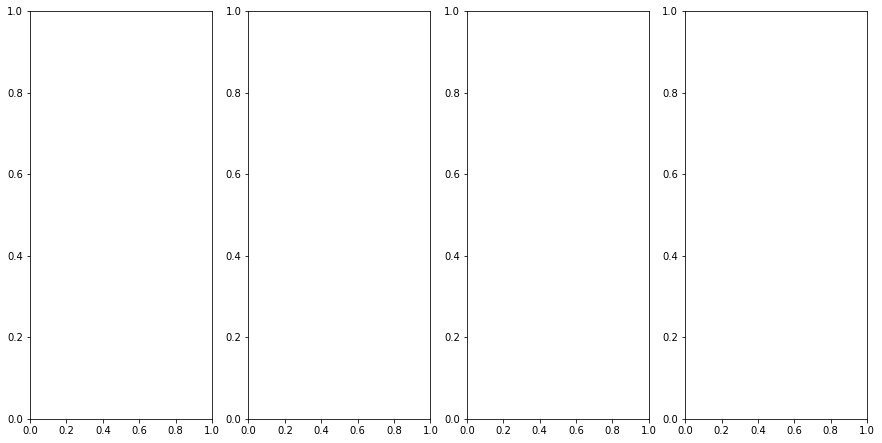

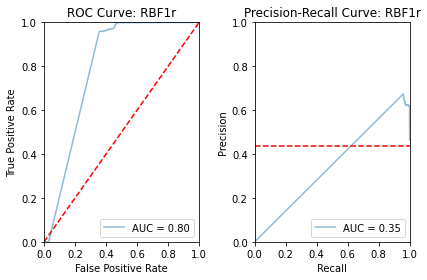

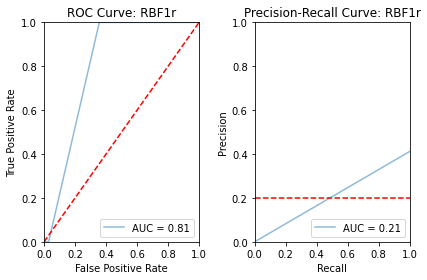

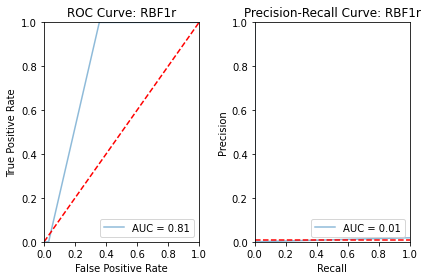

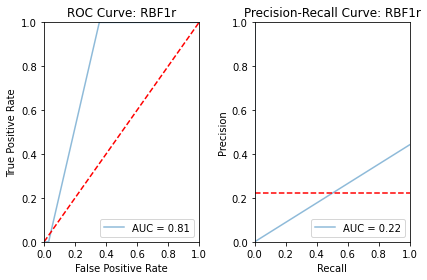

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


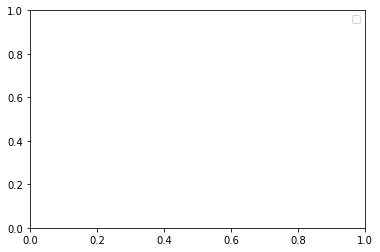

AUPR Train Run 3: 0.4776535911329175
AUPR Test Run 3: 0.400234408528014
AUPR Indiv Test Run 3: [0.3489601910197695, 0.20583234143853085, 0.009219858156028368, 0.22110269224568757]
AUPR (Train): 0.4778474219100419+-0.00020414285481335542
AUPR (Test): 0.4013041338421231+-0.001060723845932651


,0,1,2,AUPR Mean,AUPR Std
1,0.349884,0.352202,0.348960,0.350349,0.001670
2,0.206782,0.209465,0.205832,0.207360,0.001884
3,0.009291,0.009495,0.009220,0.009335,0.000143
4,0.222069,0.224799,0.221103,0.222657,0.001917


([0.477759043801318, 0.47812963079589027, 0.4776535911329175],
 [0.4009282449247838, 0.4027497480735715, 0.400234408528014],
 {0: [0.3498838061592538,
   0.20678168773488212,
   0.009291023441966839,
   0.22206930051813473],
  1: [0.35220170515739224,
   0.20946530541616196,
   0.009494595384165937,
   0.22479921324373053],
  2: [0.3489601910197695,
   0.20583234143853085,
   0.009219858156028368,
   0.22110269224568757]})

In [15]:
# RBFr
repeats=3
separation = "RBF"
bumped = "r"
sigma = 2.
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_rbf = []

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot, hidden_layers=len(neurons),
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks, pos_label=0)
    
    models_rbf.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
results_df['AUPR Std'] = results_df.iloc[:, :-1].std(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks